# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

Answer:

What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs? How would you adjust the graphs shown to improve the presentation?

Graph 1 & 2 — Separate Line Graphs
These show nitrate and phosphate levels separately over 12 months.
Graph 3 — Stacked Area Plot
This combines both series (ser1 = nitrate, ser2 = phosphate) into a single stacked area plot.

Advantages of the Area Plot (Graph 3):
Compact comparison: It shows both nutrients together in one plot, saving space.
Visual total load: You can easily see the combined nutrient level (total height of the stacked area).
Smooth, continuous look: The filled area provides a more aesthetically "full" graph.

Disadvantages of the Area Plot (Graph 3):
Harder to compare individual nutrients: Phosphate (top layer) is distorted because it sits on top of nitrate, making its trend harder to interpret.
No clear labels: The legend uses generic labels (ser1, ser2), forcing the viewer to guess what the colors represent.
Visual confusion: If phosphate ever dips below nitrate, it could swap positions in a stacked plot (though not shown here, it's a risk with overlapping data).
Color clarity: Without transparency or borders, it’s harder to distinguish overlapping areas.

Advantages of the Line Graphs (Graphs 1 & 2):
Clear trend visibility: Each nutrient's rise and fall is easily observed.
Independent y-scales (if needed) allow better focus on each nutrient’s variation.
No distortion: Both start from the same baseline (0%), so comparisons are fair

Disadvantages of the Line Graphs:
More screen space required: Two separate graphs require more vertical space.
Harder to compare simultaneously: You must mentally track both graphs to compare nitrate and phosphate behavior.

How to Improve these Graphs
Area Plot (Graph 3)
Rename the legend: change 'ser1' → 'Nitrate', 'ser2' → 'Phosphate'.
Use transparency: df.plot.area(alpha=0.6) to allow both layers to show clearly.
Add a title and y-axis label: e.g., "Monthly nutrient levels as % of eutrophic threshold".
Add a horizontal line at y=100: to show eutrophic threshold if relevant.
Reordering if one nutrient consistently dominates, consider putting it on the bottom layer.

Line Graphs (Graph 1 & 2)
Overlay both in a single graph: use sns.lineplot() for both series in one plot with distinct colors and labels.
Add a shared legend: with line color keys for nitrate and phosphate.
Add titles and threshold references (e.g., a dashed line at 100%).
Rotate x-axis labels (they currently overlap at the bottom of Graph 1).


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

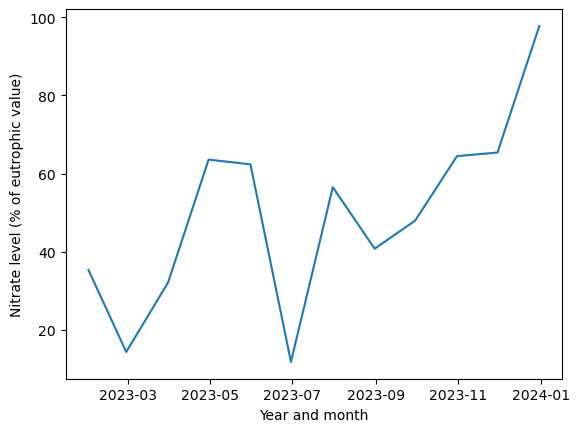

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

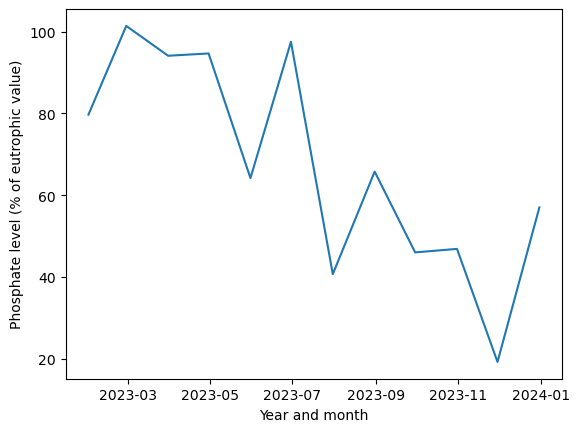

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

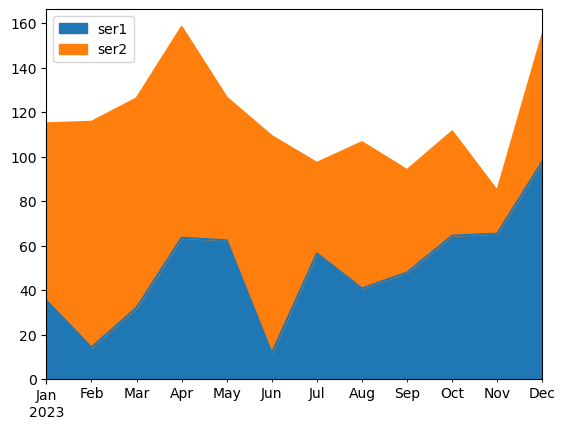

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [5]:
# Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 1. Load Datasets
# Step 1: Set your working directory
os.chdir(r"C:\Users\jalin\Documents\data\AILeader")
print("Working directory set to:", os.getcwd())

# === Load Datasets ===
diabetes_df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
htn_df = pd.read_csv("hypertension_dataset.csv") 
ckd_df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

Working directory set to: C:\Users\jalin\Documents\data\AILeader


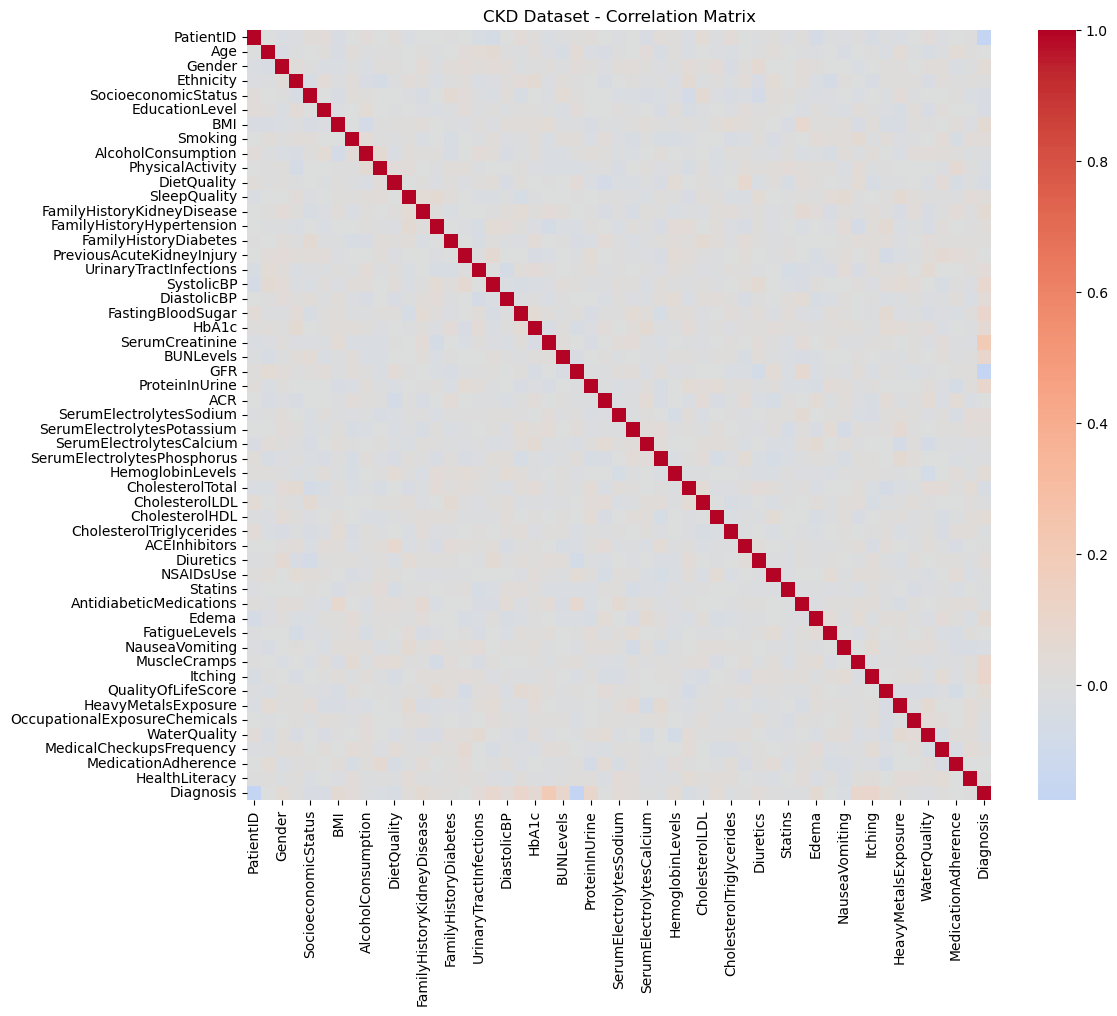

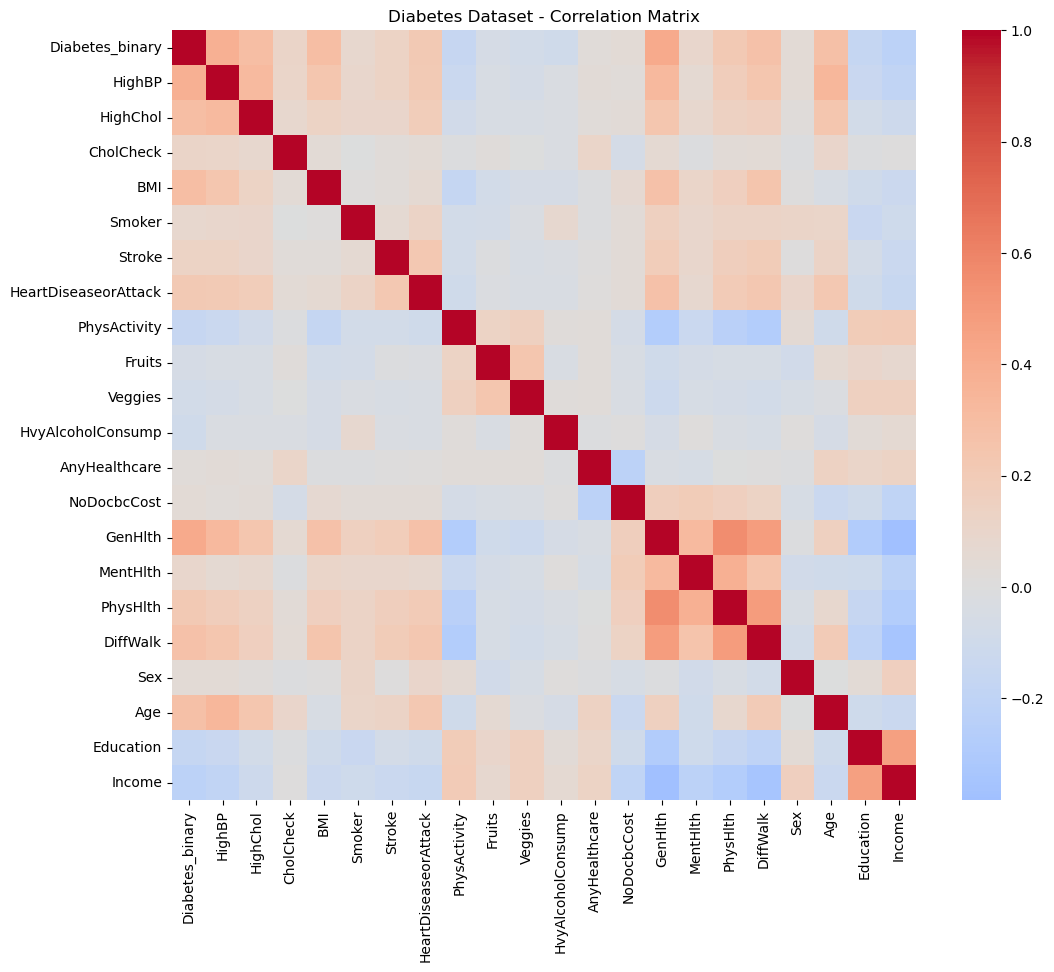

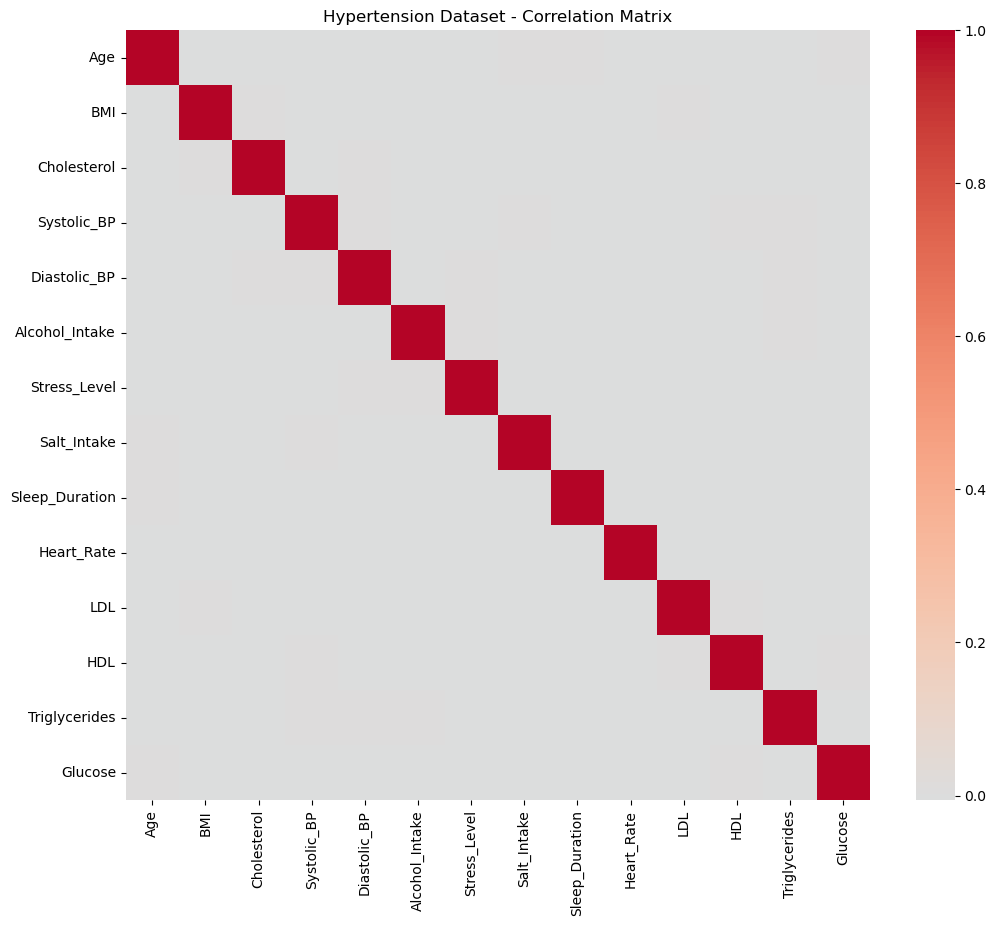

In [7]:
# 2. Correlation Analysis

### CKD Dataset Correlations
ckd_corr = ckd_df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,10))
sns.heatmap(ckd_corr, cmap='coolwarm', center=0)
plt.title('CKD Dataset - Correlation Matrix')
plt.show()

### Diabetes Dataset Correlations
diabetes_corr = diabetes_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(diabetes_corr, cmap='coolwarm', center=0)
plt.title('Diabetes Dataset - Correlation Matrix')
plt.show()

### Hypertension Dataset Correlations
htn_corr = htn_df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,10))
sns.heatmap(htn_corr, cmap='coolwarm', center=0)
plt.title('Hypertension Dataset - Correlation Matrix')
plt.show()

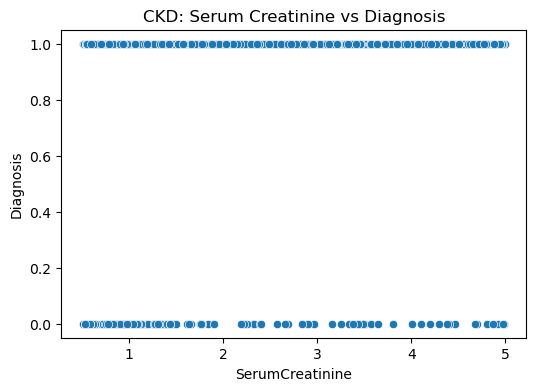

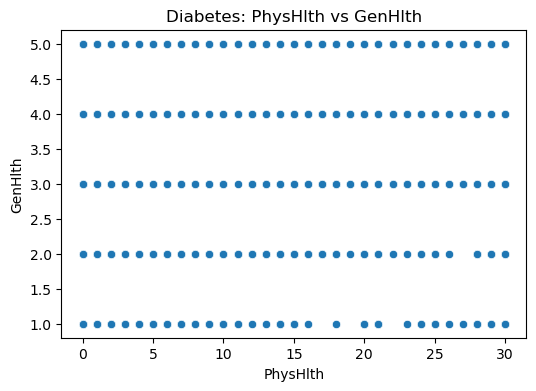

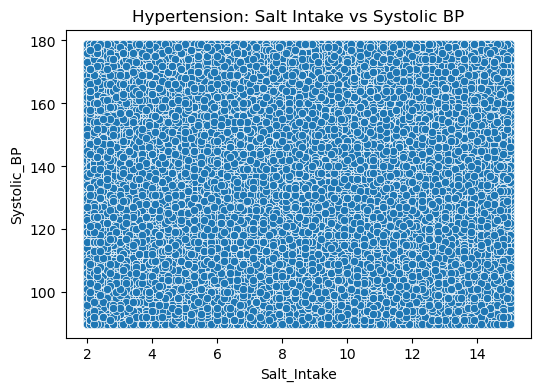

In [8]:
# 3. Scatterplots for Top Correlations

# CKD: Serum Creatinine vs Diagnosis
plt.figure(figsize=(6,4))
sns.scatterplot(x='SerumCreatinine', y='Diagnosis', data=ckd_df)
plt.title('CKD: Serum Creatinine vs Diagnosis')
plt.show()

# Diabetes: PhysHlth vs GenHlth
plt.figure(figsize=(6,4))
sns.scatterplot(x='PhysHlth', y='GenHlth', data=diabetes_df)
plt.title('Diabetes: PhysHlth vs GenHlth')
plt.show()

# Hypertension: Salt Intake vs Systolic BP (weak correlation)
plt.figure(figsize=(6,4))
sns.scatterplot(x='Salt_Intake', y='Systolic_BP', data=htn_df)
plt.title('Hypertension: Salt Intake vs Systolic BP')
plt.show()

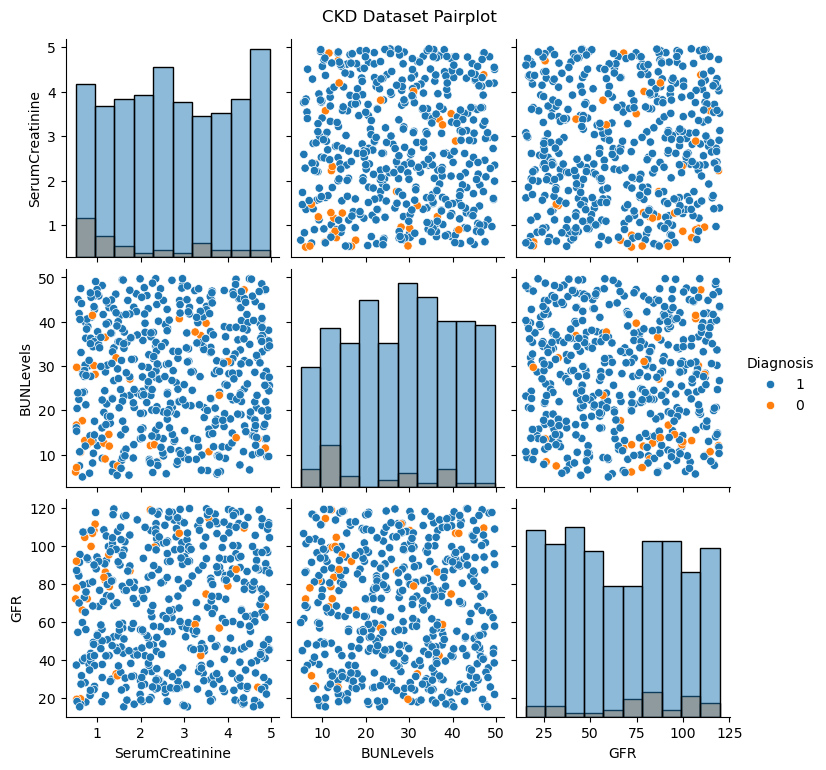

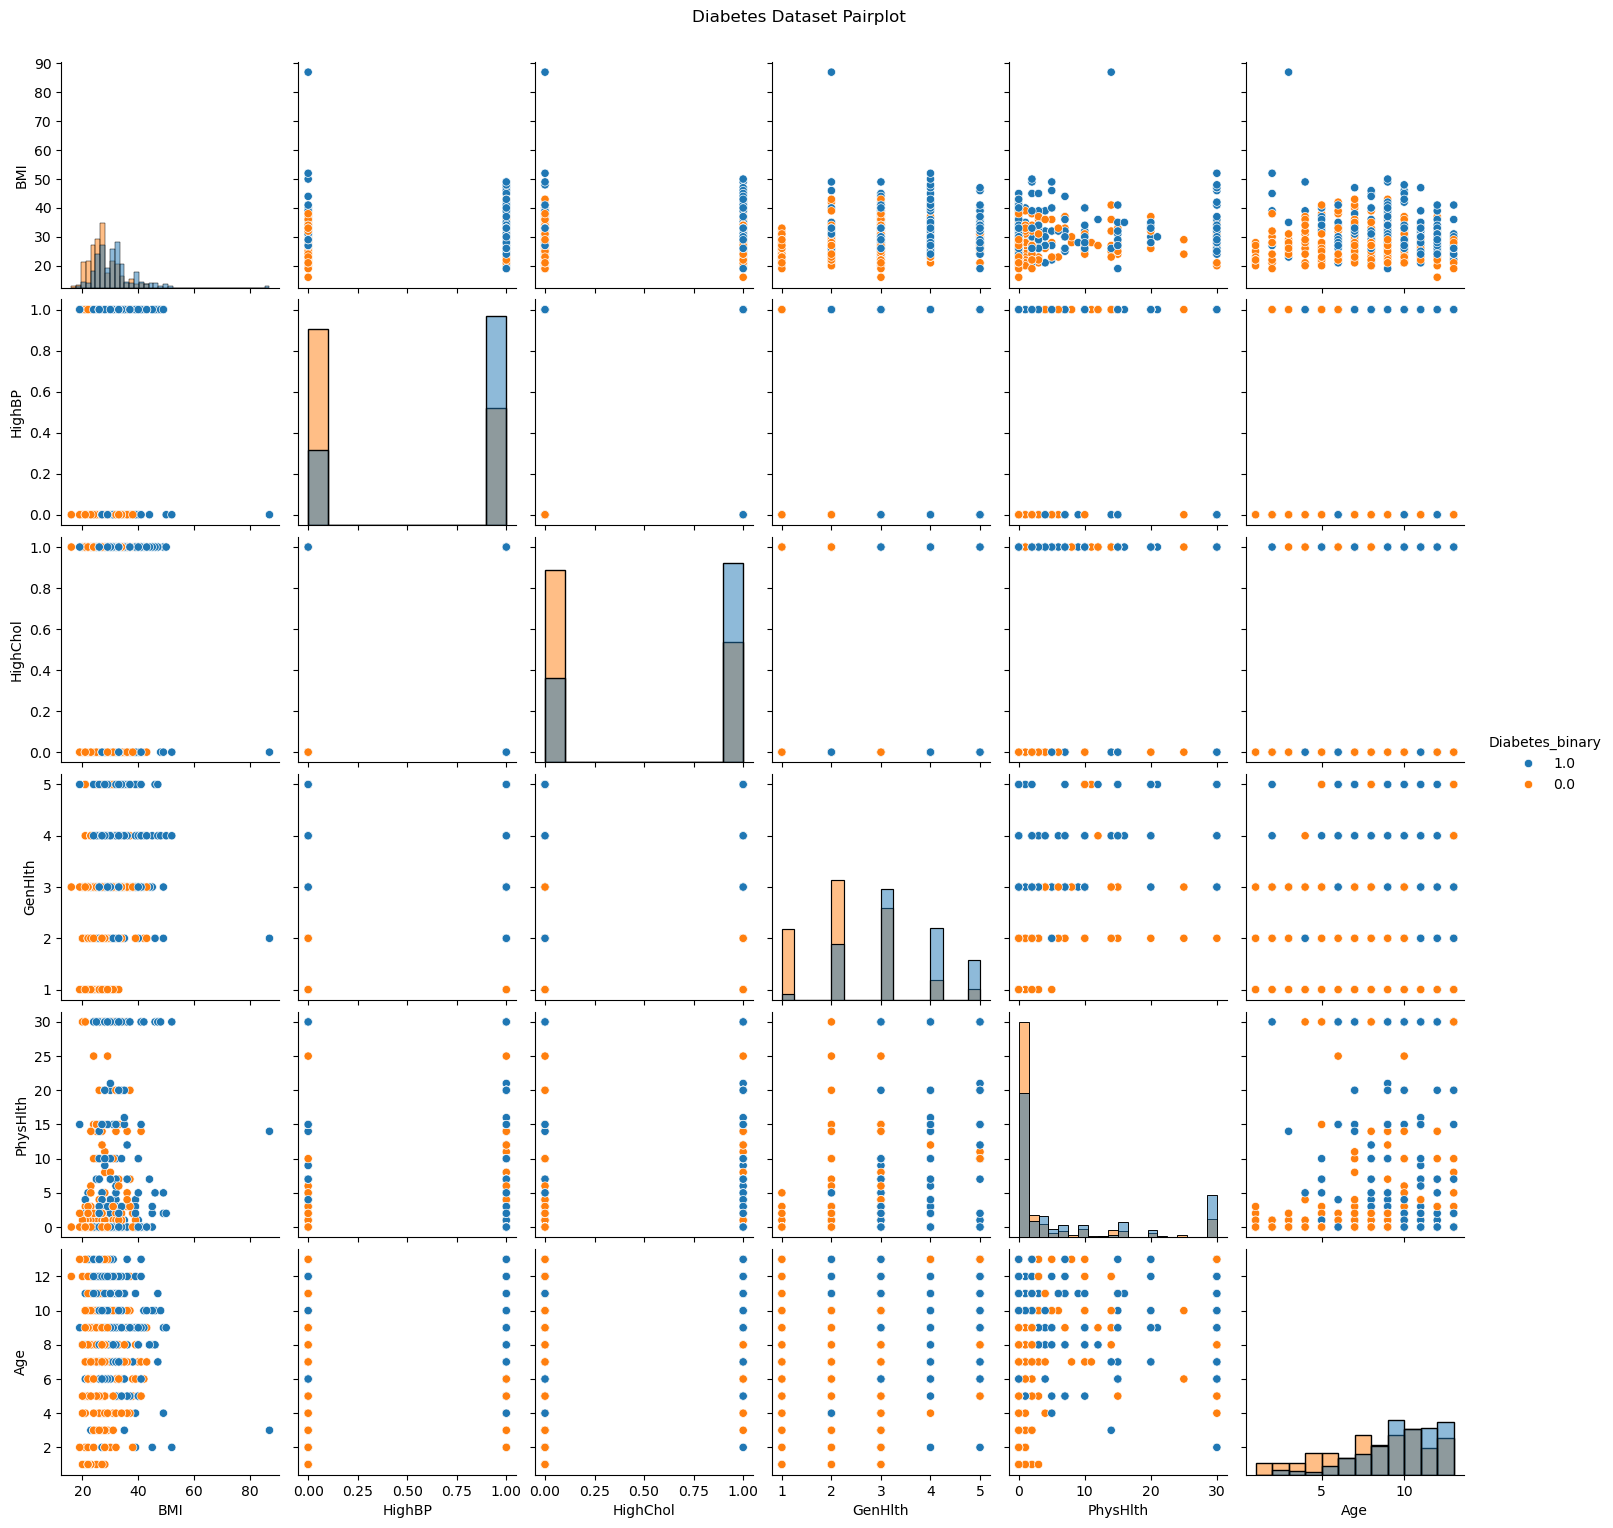

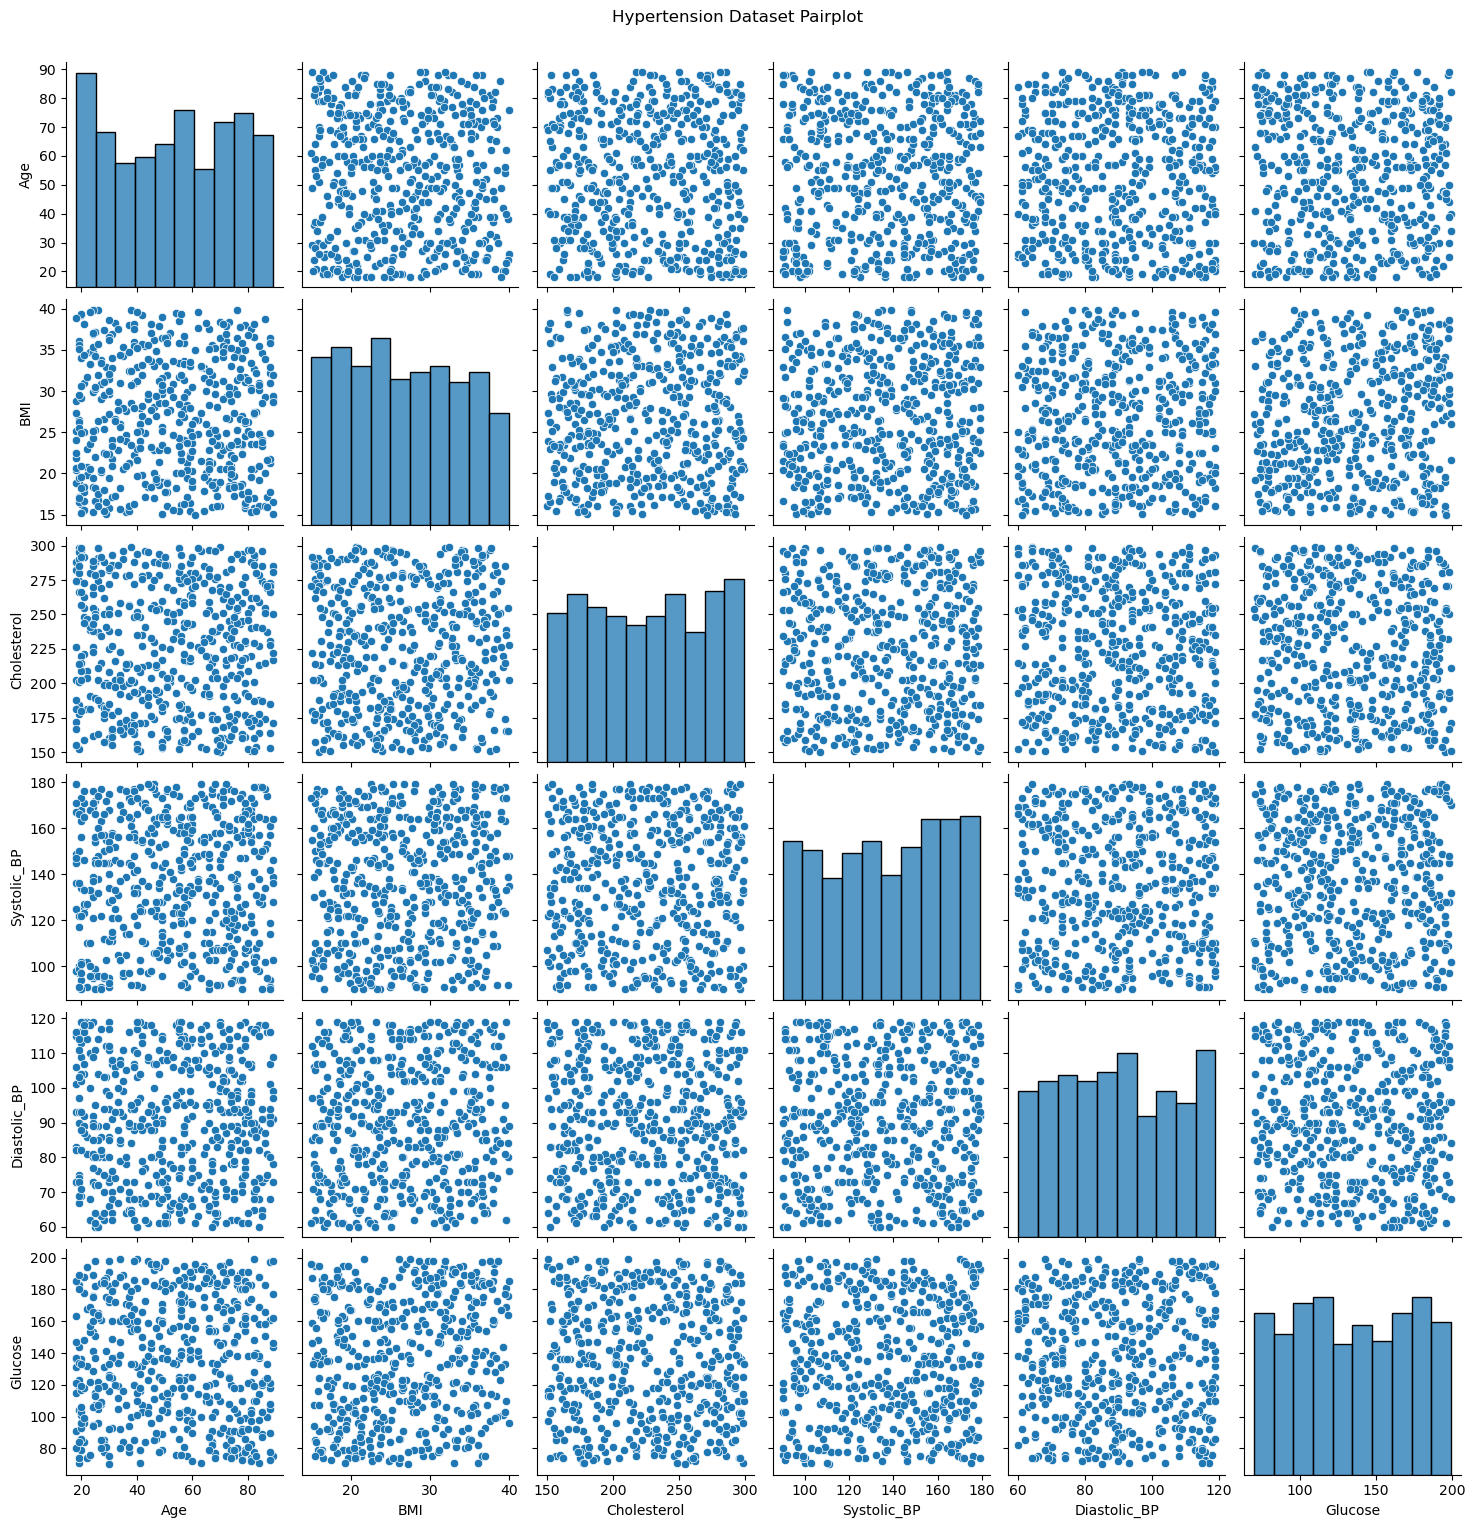

In [9]:
# 3. Pairplots

# CKD Pairplot
ckd_features = ['SerumCreatinine', 'BUNLevels', 'GFR', 'Diagnosis']
ckd_sample = ckd_df[ckd_features].sample(500, random_state=1)
ckd_sample['Diagnosis'] = ckd_sample['Diagnosis'].astype(str)
sns.pairplot(ckd_sample, hue='Diagnosis', diag_kind='hist')
plt.suptitle('CKD Dataset Pairplot', y=1.02)
plt.show()

# Diabetes Pairplot
diabetes_features = ['BMI', 'HighBP', 'HighChol', 'GenHlth', 'PhysHlth', 'Age', 'Diabetes_binary']
diabetes_sample = diabetes_df[diabetes_features].sample(500, random_state=2)
diabetes_sample['Diabetes_binary'] = diabetes_sample['Diabetes_binary'].astype(str)
sns.pairplot(diabetes_sample, hue='Diabetes_binary', diag_kind='hist')
plt.suptitle('Diabetes Dataset Pairplot', y=1.02)
plt.show()

# Hypertension Pairplot
htn_features = ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Glucose']
htn_sample = htn_df[htn_features].sample(500, random_state=3)
sns.pairplot(htn_sample, diag_kind='hist')
plt.suptitle('Hypertension Dataset Pairplot', y=1.02)
plt.show()

In [10]:
# 4. Line and Area Graphs

# NOTE: None of the datasets have date or time data.


Summary of my datasets and the projet which I have chosen:

Project as Helathcare field.

The following Topic has been selected.

Identifying Risk Factors Across Chronic Diseases: 
https://drive.google.com/file/d/1evYscqQvK7GoxiyRKmNcHuYrpmudH3il/view?usp=drive_link

In this collection of datasets I have following.
Healthcare Project: Identifying Risk Factors Across Chronic Diseases
This project focuses on understanding and predicting the development of three major
chronic illnesses—hypertension, chronic kidney disease (CKD), and diabetes—through
lifestyle, demographic, and clinical risk factors. By comparing and analyzing multiple real-
world datasets, the goal is to uncover overlapping risk indicators and investigate how

preventive strategies can reduce disease onset.
Dataset Creator Question: What demographic and lifestyle factors are most strongly
associated with the risk of developing chronic diseases like diabetes, hypertension, or
CKD?

Datasets:
1. Hypertension Risk Prediction Dataset
Includes lifestyle, demographic, and clinical data (e.g., BMI, cholesterol, stress,
salt intake, smoking, family history) from individuals across multiple countries. It is
labeled for classification tasks (low vs. high risk of hypertension).

https://www.kaggle.com/datasets/ankushpanday1/hypertension-risk-prediction-
dataset

2. Chronic Kidney Disease Dataset
Contains comprehensive data for 1,659 patients, including 54 variables spanning
medical history, lab results, medication usage, quality of life, and environmental
exposure. Ideal for regression, classification, and clustering analyses.

https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-
dataset-analysis

3. Diabetes Health Indicators Dataset
Over 250,000 responses from a U.S. national health survey with demographic and
lifestyle variables (e.g., BMI, activity level, smoking, sleep, general health).
Designed for predicting diabetes status (none, pre-diabetic, diabetic).
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


In Diabetic 3 subsets of data i used following as my selected dataset.
Use the diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015.
Because:
Balanced for clear trends and relationships
Easier to visualize and interpret without skew from class imbalance
Simplifies comparisons with hypertension and CKD datasets (which are binary classification)

##########################################

Conclusions:

Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

1. Are the data what you expect?
Yes, the data generally align with clinical and public health expectations:

In the Chronic Kidney Disease dataset, higher serum creatinine and lower GFR correlate with CKD diagnosis, matching clinical knowledge.

In the Diabetes dataset, worse general health ratings, higher BMI, and blood pressure associate with diabetes presence, as expected.

The Hypertension dataset shows minimal linear correlations among numerical features, suggesting that hypertension risk in this dataset may be driven more by categorical or lifestyle factors.

############################################

2. Are the data likely to be usable?
Yes.
All three datasets are usable for:

Supervised learning (e.g. classification of disease status).

Unsupervised learning (e.g. clustering patients by risk profiles).

However, the Hypertension dataset shows near-zero numerical correlations, suggesting further feature engineering, categorical encoding, or additional clinical data may be needed for strong predictive models.

############################################

3. Do you see any outliers? (Data points that are far from the rest of the data).

Yes.

In CKD data, extremely high serum creatinine or low GFR values are visible in scatterplots.

In Diabetes data, BMI values up to 98 are outliers compared to typical ranges.

In Hypertension data, some very high systolic BP and cholesterol values are potential outliers.

What we can do: These should be reviewed to ensure they are true extreme cases and not data entry errors before modeling.

#############################################

4. Are any data items highly correlated with each other, suggesting that they are redundant?

Diabetes dataset: Strong correlation between Physical Health days and General Health ratings (+0.55) suggests they capture similar aspects of health status. Including both in models may introduce multicollinearity.

CKD dataset: Serum Creatinine and GFR are clinically related but showed only moderate inverse correlation (–0.18 here), so may both provide useful information.

#############################################

5. For the line plots, do you see a trend or pattern over time?
Not applicable.

None of the datasets include date or time variables, so line or area plots over time could not be generated.

Consequently, no assessment of data drift over time is possible with the current datasets.

##############################################

6. Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

No, this does not suggest data drift over time because:
None of the datasets contain date or time variables to assess whether the data are changing over time.
All three datasets are cross-sectional, meaning they represent measurements taken at a single point in time for each individual.

##############################################

7. Can you think of any confounding variables? (Third variables that could explain any correlations between other variables. These third variables may or may not be reported in the dataset.)

Yes. Possible confounders include:

Age: Older age may correlate with both disease status and other variables (e.g. BP, cholesterol).

Lifestyle factors: Smoking, alcohol use, and physical activity could confound relationships between lab results and disease outcomes.

Socioeconomic factors: Income and education levels in the Diabetes dataset may impact health status and behaviors, confounding other associations.

Overall Conclusion
The datasets are generally usable for supervised and unsupervised learning tasks, though careful outlier review, potential confounder adjustment, and feature selection are recommended to ensure valid and reliable modeling results.


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

I have selected Figure 5.13 from page 93 - Distribution by custoemr segment.

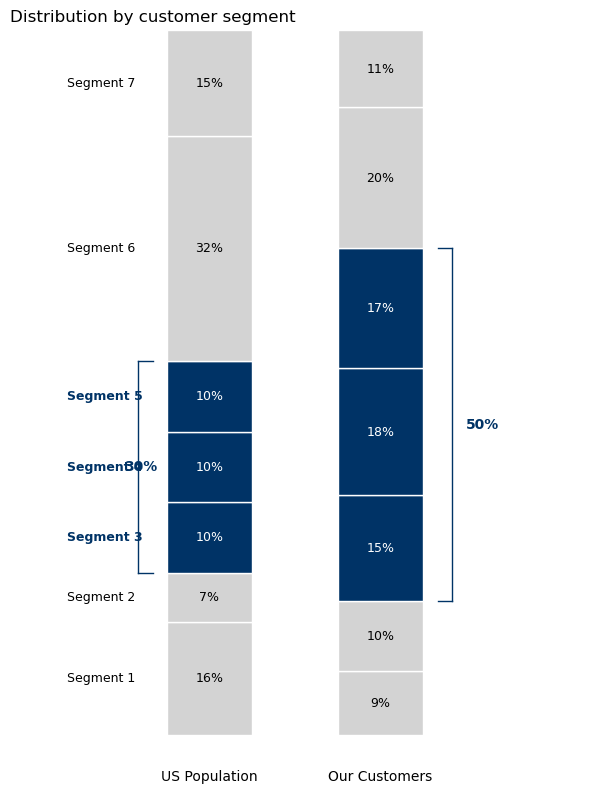

In [17]:
import matplotlib.pyplot as plt

# Data (Segment order from bottom to top)
segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5', 'Segment 6', 'Segment 7']
us_pop = [16, 7, 10, 10, 10, 32, 15]
our_cust = [9, 10, 15, 18, 17, 20, 11]

highlight_segments = ['Segment 3', 'Segment 4', 'Segment 5']

# Colors: dark blue for highlighted segments, lightgrey otherwise
colors = ['#003366' if seg in highlight_segments else 'lightgrey' for seg in segments]

# Setup plot
fig, ax = plt.subplots(figsize=(6,8))
ax.set_xlim(0,2)
ax.set_ylim(0,100)
ax.axis('off')
plt.title('Distribution by customer segment', loc='left', fontsize=12)

# Function to plot stacked bars
def stacked_bar(x, data, label):
    bottom = 0
    for i in range(len(data)):
        color = '#003366' if segments[i] in highlight_segments else 'lightgrey'
        text_color = 'white' if segments[i] in highlight_segments else 'black'
        ax.bar(x, data[i], bottom=bottom, color=color, width=0.3, edgecolor='white')
        ax.text(x, bottom + data[i]/2, f"{data[i]}%", ha='center', va='center', fontsize=9, color=text_color)
        bottom += data[i]
    ax.text(x, -5, label, ha='center', va='top')

# Plot both bars
stacked_bar(0.7, us_pop, 'US Population')
stacked_bar(1.3, our_cust, 'Our Customers')

# Add segment labels
us_bottom = 0
for i, seg in enumerate(segments):
    color = '#003366' if seg in highlight_segments else 'black'
    ax.text(0.2, us_bottom + us_pop[i]/2, seg, va='center', fontsize=9, color=color, fontweight='bold' if seg in highlight_segments else 'normal')
    us_bottom += us_pop[i]

# Calculate bracket start and height for US Population
us_start = sum(us_pop[:2])
us_height = sum(us_pop[2:5])
# Draw bracket (left of bar)
ax.plot([0.5, 0.45], [us_start, us_start], color='#003366', lw=1)
ax.plot([0.5, 0.45], [us_start+us_height, us_start+us_height], color='#003366', lw=1)
ax.plot([0.45, 0.45], [us_start, us_start+us_height], color='#003366', lw=1)
ax.text(0.4, us_start + us_height/2, '30%', va='center', fontsize=10, color='#003366', fontweight='bold')

# Calculate bracket start and height for Our Customers
cust_start = sum(our_cust[:2])
cust_height = sum(our_cust[2:5])
# Draw bracket (right of bar)
ax.plot([1.5, 1.55], [cust_start, cust_start], color='#003366', lw=1)
ax.plot([1.5, 1.55], [cust_start+cust_height, cust_start+cust_height], color='#003366', lw=1)
ax.plot([1.55, 1.55], [cust_start, cust_start+cust_height], color='#003366', lw=1)
ax.text(1.6, cust_start + cust_height/2, '50%', va='center', fontsize=10, color='#003366', fontweight='bold')

plt.tight_layout()
plt.show()
